<img src="../../../images/banners/seaborn.png" width="500"/>

<a class="anchor" id="visualizing_distributions_of_data"></a>
# <img src="../../../images/logos/seaborn.png" width="23"/>  Visualizing distributions of data

## <img src="../../../images/logos/toc.png" width="20"/> Table of Contents 
* [Visualizing distributions of data](#visualizing_distributions_of_data)
    * [Plotting univariate histograms](#plotting_univariate_histograms)
        * [Choosing the bin size](#choosing_the_bin_size)
        * [Conditioning on other variables](#conditioning_on_other_variables)
        * [Normalized histogram statistics](#normalized_histogram_statistics)
    * [Kernel density estimation](#kernel_density_estimation)
        * [Choosing the smoothing bandwidth](#choosing_the_smoothing_bandwidth)
        * [Conditioning on other variables](#conditioning_on_other_variables)
        * [Kernel density estimation pitfalls](#kernel_density_estimation_pitfalls)
    * [Empirical cumulative distributions](#empirical_cumulative_distributions)
    * [Visualizing bivariate distributions](#visualizing_bivariate_distributions)
    * [Distribution visualization in other settings](#distribution_visualization_in_other_settings)
        * [Plotting joint and marginal distributions](#plotting_joint_and_marginal_distributions)
        * [Plotting many distributions](#plotting_many_distributions)

---

In [1]:
import seaborn as sns

%matplotlib inline

An early step in any effort to analyze or model data should be to understand how the variables are distributed. Techniques for distribution visualization can provide quick answers to many important questions. What range do the observations cover? What is their central tendency? Are they heavily skewed in one direction? Is there evidence for bimodality? Are there significant outliers? Do the answers to these questions vary across subsets defined by other variables?

The [distributions module](https://seaborn.pydata.org/tutorial/../api.html#distribution-api) contains several functions designed to answer questions such as these. The axes-level functions are [`histplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.histplot.html#seaborn.histplot "seaborn.histplot"), [`kdeplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.kdeplot.html#seaborn.kdeplot "seaborn.kdeplot"), [`ecdfplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.ecdfplot.html#seaborn.ecdfplot "seaborn.ecdfplot"), and [`rugplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.rugplot.html#seaborn.rugplot "seaborn.rugplot"). They are grouped together within the figure-level [`displot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.displot.html#seaborn.displot "seaborn.displot"), [`jointplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.jointplot.html#seaborn.jointplot "seaborn.jointplot"), and [`pairplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.pairplot.html#seaborn.pairplot "seaborn.pairplot") functions.

To control the figure type, the `kind` parameter takes the following options:
- `histplot()` (with `kind="hist"`; the default)
- `kdeplot()` (with `kind="kde"`)
- `ecdfplot()` (with `kind="ecdf"`; univariate-only)

Additionally, a `rugplot()` can be added to any kind of plot to show individual observations.

There are several different approaches to visualizing a distribution, and each has its relative advantages and drawbacks. It is important to understand these factors so that you can choose the best approach for your particular aim.

<a class="anchor" id="plotting_univariate_histograms"></a>
## Plotting univariate histograms

Perhaps the most common approach to visualizing a distribution is the *histogram*. This is the default approach in [`displot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.displot.html#seaborn.displot "seaborn.displot"), which uses the same underlying code as [`histplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.histplot.html#seaborn.histplot "seaborn.histplot"). A histogram is a bar plot where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar:

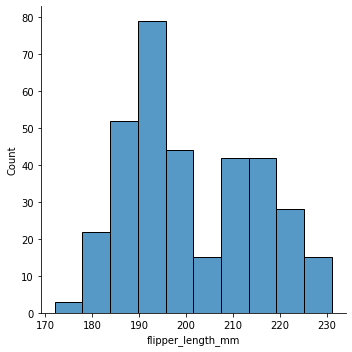

In [2]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

This plot immediately affords a few insights about the `flipper_length_mm` variable. For instance, we can see that the most common flipper length is about 195 mm, but the **distribution appears bimodal**, so this one number does not represent the data well.

<a class="anchor" id="choosing_the_bin_size"></a>
### Choosing the bin size

The size of the bins is an important parameter, and using the wrong bin size can mislead by obscuring important features of the data or by creating apparent features out of random variability. By default, [`displot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.displot.html#seaborn.displot "seaborn.displot")/[`histplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.histplot.html#seaborn.histplot "seaborn.histplot") choose a default bin size based on the variance of the data and the number of observations. But you should not be over-reliant on such automatic approaches, because they depend on particular assumptions about the structure of your data. It is always advisable to check that your impressions of the distribution are consistent across different bin sizes. To choose the size directly, set the `binwidth` parameter:

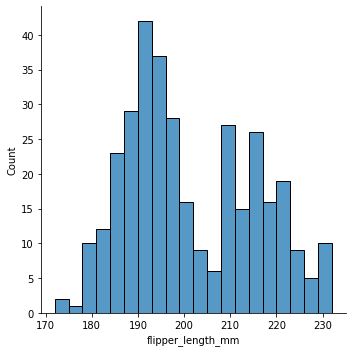

In [3]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    binwidth=3
)

In other circumstances, it may make more sense to specify the *number* of bins, rather than their size:

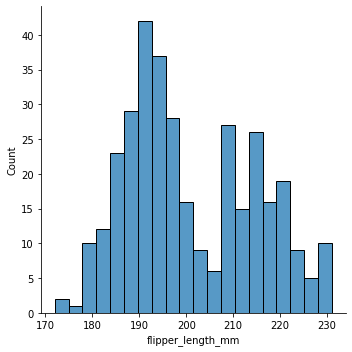

In [4]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    bins=20
)

One example of a situation where defaults fail is when the variable takes a relatively small number of integer values. In that case, the default bin width may be too small, creating awkward gaps in the distribution:

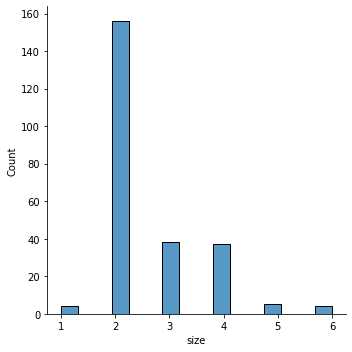

In [5]:
tips = sns.load_dataset("tips")
sns.displot(tips, x="size")

One approach would be to specify the precise bin breaks by passing an array to `bins`:

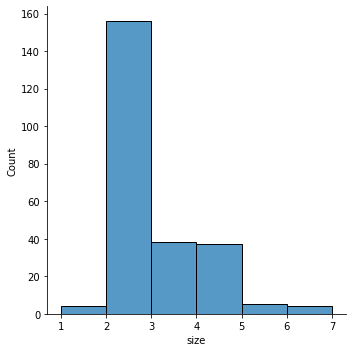

In [6]:
sns.displot(
    tips,
    x="size",
    bins=[1, 2, 3, 4, 5, 6, 7]
)

This can also be accomplished by setting `discrete=True`, which chooses bin breaks that represent the unique values in a dataset with bars that are centered on their corresponding value.

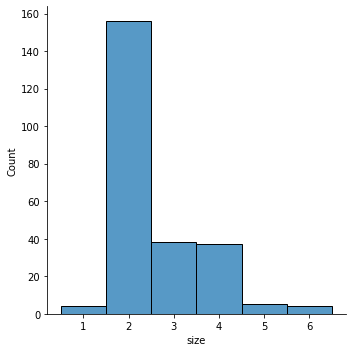

In [7]:
sns.displot(tips, x="size", discrete=True)

It’s also possible to visualize the **distribution of a categorical variable** using the logic of a histogram. Discrete bins are automatically set for categorical variables, but it may also be helpful to “shrink” the bars slightly to emphasize the categorical nature of the axis:

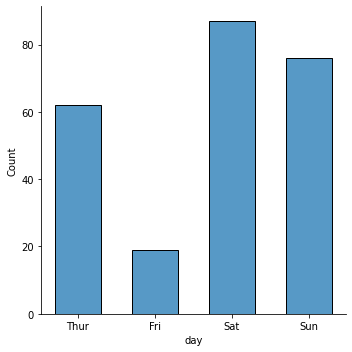

In [8]:
sns.displot(tips, x="day", shrink=.6)

<a class="anchor" id="conditioning_on_other_variables"></a>
### Conditioning on other variables

Once you understand the distribution of a variable, the next step is often to ask whether features of that distribution differ across other variables in the dataset. For example, what accounts for the bimodal distribution of flipper lengths that we saw above? [`displot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.displot.html#seaborn.displot "seaborn.displot") and [`histplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.histplot.html#seaborn.histplot "seaborn.histplot") provide support for conditional subsetting via the `hue` semantic. Assigning a variable to `hue` will draw a separate histogram for each of its unique values and distinguish them by color:

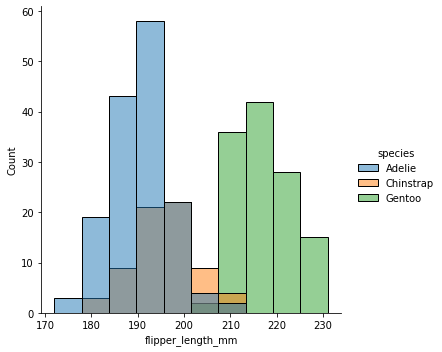

In [9]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    hue="species"
)

By default, the different histograms are “layered” on top of each other and, in some cases, they may be difficult to distinguish. One option is to change the visual representation of the histogram from a bar plot to a “step” plot:

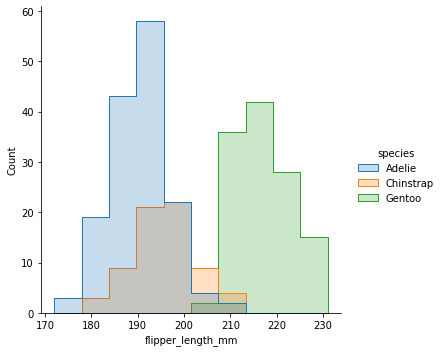

In [10]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    hue="species",
    element="step"  # options: bars, step, poly
)

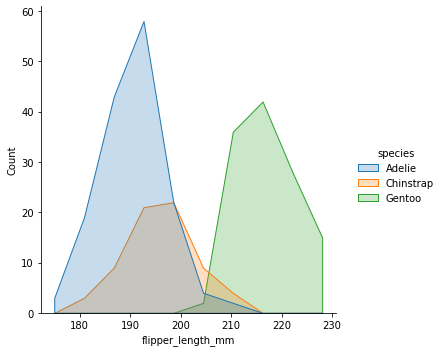

In [11]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    hue="species",
    element="poly"  # options: bars, step, poly
)

Alternatively, instead of layering each bar, they can be “stacked”, or moved vertically. In this plot, the outline of the full histogram will match the plot with only a single variable:

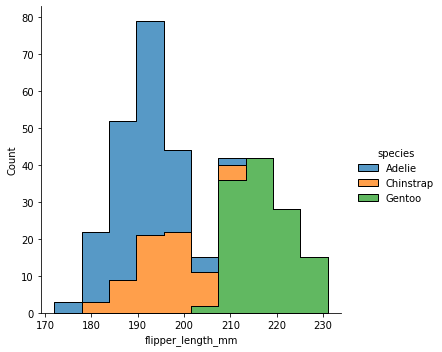

In [12]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    hue="species",
    multiple="stack",  # layer, dodge, stack, fill
    element='step',
)

The stacked histogram emphasizes the **part-whole relationship** between the variables, but it can obscure other features (for example, it is difficult to determine the mode of the Adelie distribution. Another option is “dodge” the bars, which moves them horizontally and reduces their width. This ensures that there are no overlaps and that the bars remain comparable in terms of height. But it only works well when the categorical variable has a small number of levels:

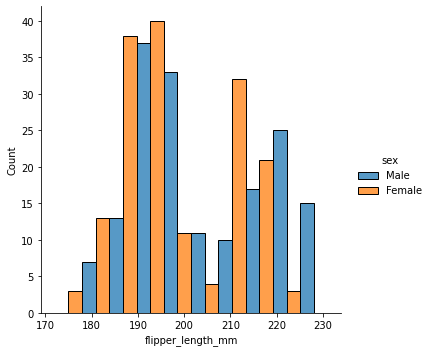

In [13]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    hue="sex",
    multiple="dodge"
)

Because [`displot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.displot.html#seaborn.displot "seaborn.displot") is a figure-level function and is drawn onto a [`FacetGrid`](https://seaborn.pydata.org/tutorial/../generated/seaborn.FacetGrid.html#seaborn.FacetGrid "seaborn.FacetGrid"), it is also possible to draw each individual distribution in a separate subplot by assigning the second variable to `col` or `row` rather than (or in addition to) `hue`. This represents the distribution of each subset well, but it makes it more difficult to draw direct comparisons:

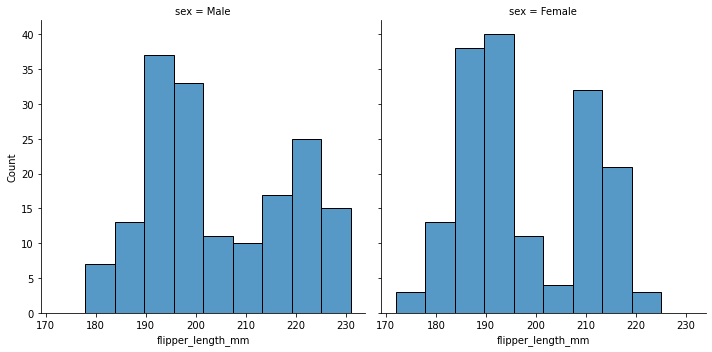

In [14]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    col="sex"
)

None of these approaches are perfect, and we will soon see some alternatives to a histogram that are better-suited to the task of comparison.

<a class="anchor" id="normalized_histogram_statistics"></a>
### Normalized histogram statistics

Before we do, another point to note is that, when the subsets have unequal numbers of observations, comparing their distributions in terms of counts may not be ideal. One solution is to *normalize* the counts using the `stat` parameter:

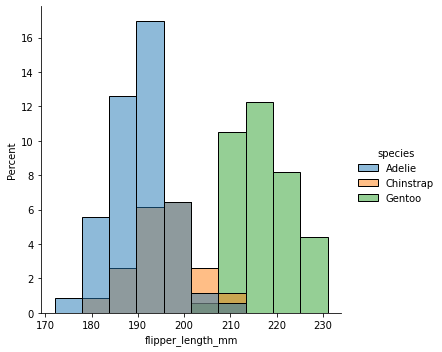

In [15]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    hue="species",
    stat="percent"
)

`stat`: Aggregate statistic to compute in each bin. Options are:

- `count`: show the number of observations in each bin
- `frequency`: show the number of observations divided by the bin width
- `probability` or `proportion`: normalize such that bar heights sum to 1
- `percent`: normalize such that bar heights sum to 100
- `density`: normalize such that the total area of the histogram equals 1

By default, however, the normalization is applied to the entire distribution, so this simply rescales the height of the bars. By setting `common_norm=False`, each subset will be normalized independently:

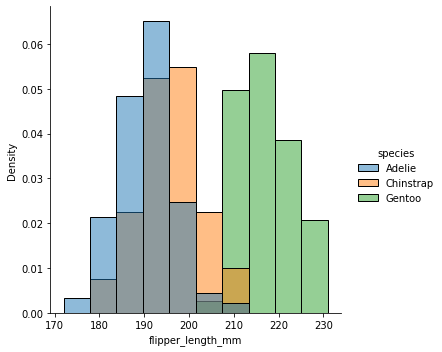

In [16]:
sns.displot(
    penguins, 
    x="flipper_length_mm", 
    hue="species", 
    stat="density", 
    common_norm=False,
)

Density normalization scales the bars so that their *areas* sum to 1. As a result, the density axis is not directly interpretable. Another option is to normalize the bars to that their *heights* sum to 1. This makes most sense when the variable is discrete, but it is an option for all histograms:

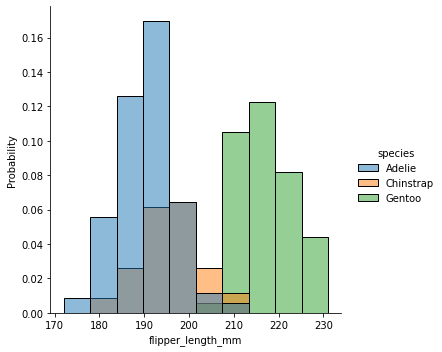

In [17]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    hue="species",
    stat="probability"
)

<a class="anchor" id="kernel_density_estimation"></a>
## Kernel density estimation

**A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations**. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

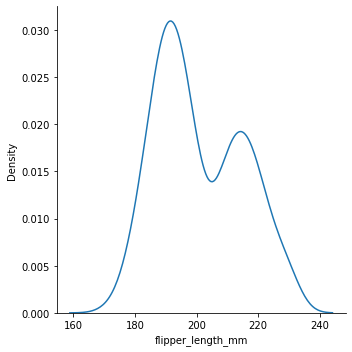

In [18]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    kind="kde"
)

<a class="anchor" id="choosing_the_smoothing_bandwidth"></a>
### Choosing the smoothing bandwidth

Much like with the bin size in the histogram, the ability of the KDE to accurately represent the data depends on the choice of smoothing bandwidth. An over-smoothed estimate might erase meaningful features, but an under-smoothed estimate can obscure the true shape within random noise. The easiest way to check the robustness of the estimate is to adjust the default bandwidth:

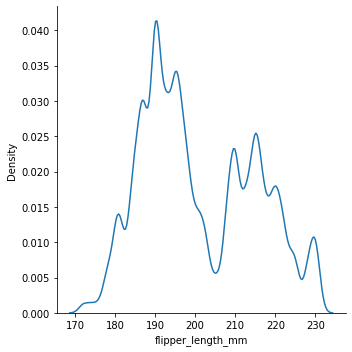

In [19]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    kind="kde",
    bw_adjust=0.25,
)

Note how the narrow bandwidth makes the bimodality much more apparent, but the curve is much less smooth. In contrast, a larger bandwidth obscures the bimodality almost completely:

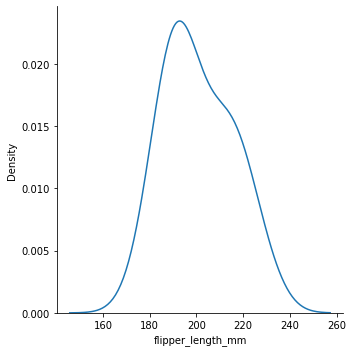

In [20]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    kind="kde",
    bw_adjust=2
)

<a class="anchor" id="conditioning_on_other_variables"></a>
### Conditioning on other variables

As with histograms, if you assign a `hue` variable, a separate density estimate will be computed for each level of that variable:

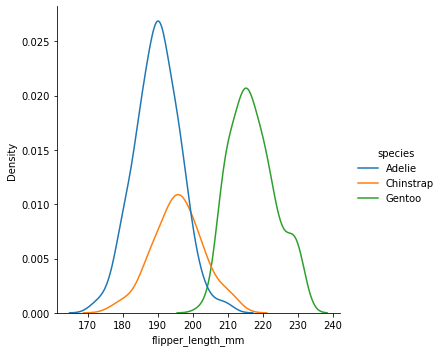

In [21]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    hue="species",
    kind="kde"
)

In many cases, the layered KDE is easier to interpret than the layered histogram, so it is often a good choice for the task of comparison. Many of the same options for resolving multiple distributions apply to the KDE as well, however:

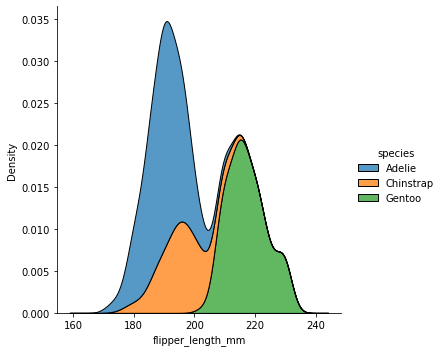

In [22]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    hue="species",
    kind="kde",
    multiple="stack"
)

Note how the stacked plot filled in the area between each curve by default. It is also possible to fill in the curves for single or layered densities, although the default alpha value (opacity) will be different, so that the individual densities are easier to resolve.

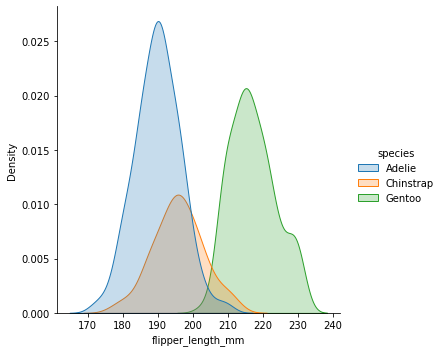

In [23]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    hue="species",
    kind="kde",
    fill=True
)

<a class="anchor" id="kernel_density_estimation_pitfalls"></a>
### Kernel density estimation pitfalls

KDE plots have many advantages. Important features of the data are easy to discern (central tendency, bimodality, skew), and they afford easy comparisons between subsets. But there are also situations where KDE poorly represents the underlying data. This is because **the logic of KDE assumes that the underlying distribution is smooth and unbounded**. One way this assumption can fail is when a variable reflects a quantity that is naturally bounded. If there are observations lying close to the bound (for example, small values of a variable that cannot be negative), the KDE curve may extend to unrealistic values:

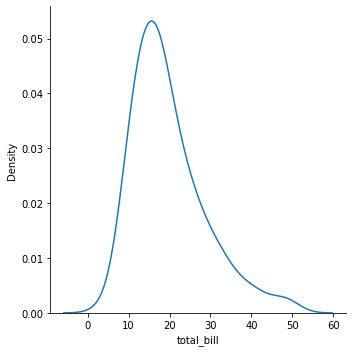

In [24]:
sns.displot(
    tips,
    x="total_bill",
    kind="kde"
)

This can be partially avoided with the `cut` parameter, which specifies how far the curve should extend beyond the extreme datapoints. But this influences only where the curve is drawn; the density estimate will still smooth over the range where no data can exist, causing it to be artificially low at the extremes of the distribution:

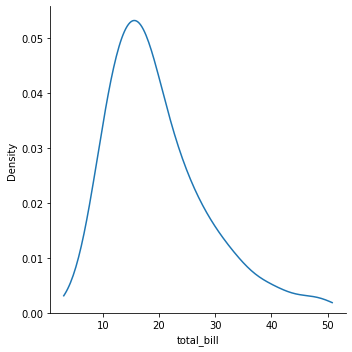

In [25]:
sns.displot(
    tips,
    x="total_bill",
    kind="kde",
    cut=0
)

**The KDE approach also fails for discrete data or when data are naturally continuous but specific values are over-represented**. The important thing to keep in mind is that the KDE will *always show you a smooth curve*, even when the data themselves are not smooth. For example, consider this distribution of diamond weights:

In [26]:
diamonds = sns.load_dataset("diamonds")

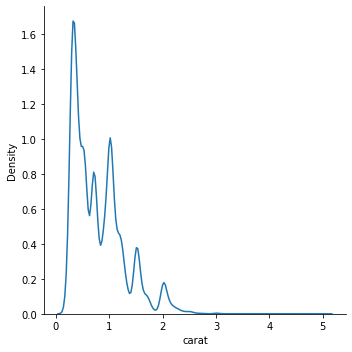

In [27]:
sns.displot(
    diamonds,
    x="carat",
    kind="kde"
)

While the KDE suggests that there are peaks around specific values, the histogram reveals a much more jagged distribution:

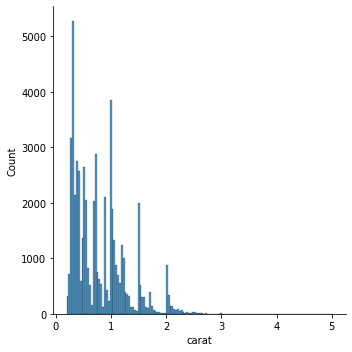

In [28]:
sns.displot(diamonds, x="carat")

As a compromise, it is possible to combine these two approaches. While in histogram mode, [`displot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.displot.html#seaborn.displot "seaborn.displot") (as with [`histplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.histplot.html#seaborn.histplot "seaborn.histplot")) has the option of including the smoothed KDE curve (note `kde=True`, not `kind="kde"`):

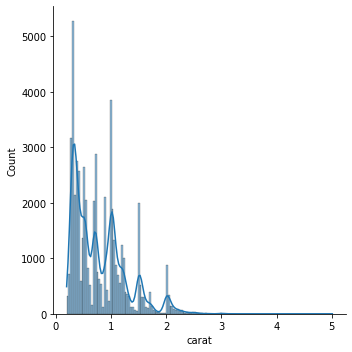

In [29]:
sns.displot(
    diamonds,
    x="carat",
    kde=True
)

<a class="anchor" id="empirical_cumulative_distributions"></a>
## Empirical cumulative distributions

A third option for visualizing distributions computes the “empirical cumulative distribution function” (ECDF). This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value:

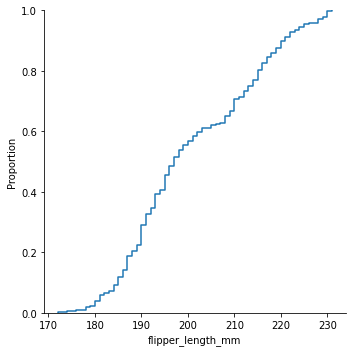

In [30]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    kind="ecdf"
)

The ECDF plot has two key advantages. **Unlike the histogram or KDE, it directly represents each datapoint**. That means there is no bin size or smoothing parameter to consider. Additionally, **because the curve is monotonically increasing, it is well-suited for comparing multiple distributions**:

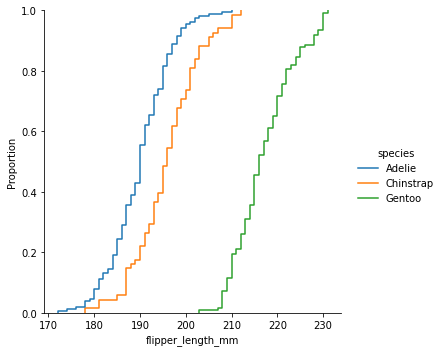

In [31]:
sns.displot(
    penguins,
    x="flipper_length_mm",
    hue="species",
    kind="ecdf"
)

The major downside to the ECDF plot is that **it represents the shape of the distribution less intuitively than a histogram or density curve**. Consider how the bimodality of flipper lengths is immediately apparent in the histogram, but to see it in the ECDF plot, you must look for varying slopes. Nevertheless, with practice, you can learn to answer all of the important questions about a distribution by examining the ECDF, and doing so can be a powerful approach.

<a class="anchor" id="visualizing_bivariate_distributions"></a>
## Visualizing bivariate distributions

All of the examples so far have considered *univariate* distributions: distributions of a single variable, perhaps conditional on a second variable assigned to `hue`. Assigning a second variable to `y`, however, will plot a *bivariate* distribution:

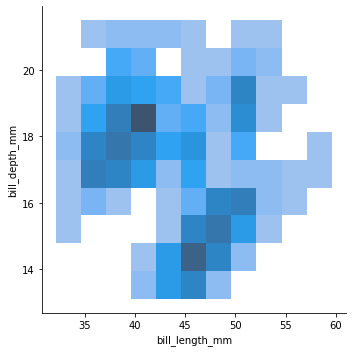

In [32]:
sns.displot(
    penguins,
    x="bill_length_mm",
    y="bill_depth_mm"
)

A bivariate histogram bins the data within rectangles that tile the plot and then shows the count of observations within each rectangle with the fill color (analogous to a [`heatmap()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.heatmap.html#seaborn.heatmap "seaborn.heatmap")). Similarly, a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian. The default representation then shows the *contours* of the 2D density:

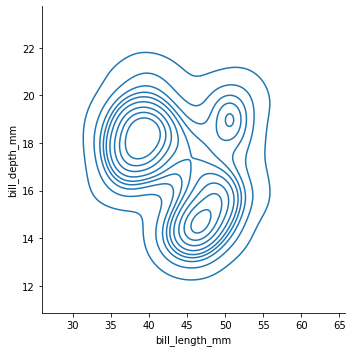

In [33]:
sns.displot(
    penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    kind="kde"
)

Assigning a `hue` variable will plot multiple heatmaps or contour sets using different colors. For bivariate histograms, this will only work well if there is minimal overlap between the conditional distributions:

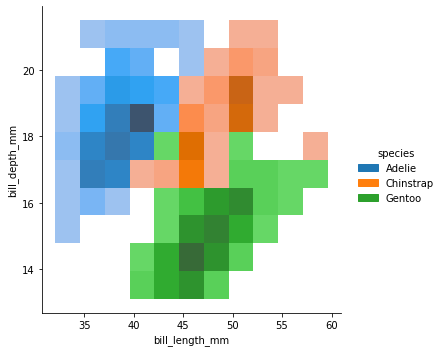

In [34]:
sns.displot(
    penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species"
)

The contour approach of the bivariate KDE plot lends itself better to evaluating overlap, although a plot with too many contours can get busy:

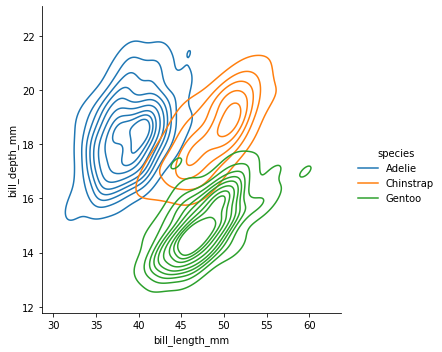

In [35]:
sns.displot(
    penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    kind="kde"
)

Just as with univariate plots, the choice of bin size or smoothing bandwidth will determine how well the plot represents the underlying bivariate distribution. The same parameters apply, but they can be tuned for each variable by passing a pair of values:

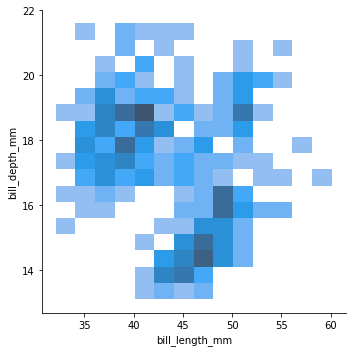

In [36]:
sns.displot(
    penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    binwidth=(2, .5)
)

To aid interpretation of the heatmap, add a colorbar to show the mapping between counts and color intensity:

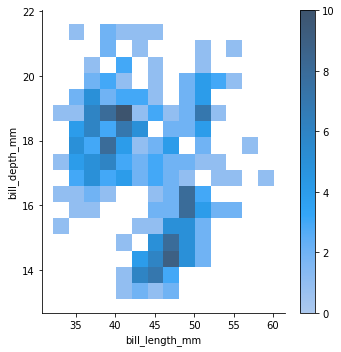

In [37]:
sns.displot(
    penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    binwidth=(2, .5),
    cbar=True
)

The meaning of the bivariate density contours is less straightforward. Because the density is not directly interpretable, the contours are drawn at *iso-proportions* of the density, meaning that each curve shows a level set such that some proportion *p* of the density lies below it. The *p* values are evenly spaced, with the lowest level contolled by the `thresh` parameter and the number controlled by `levels`:

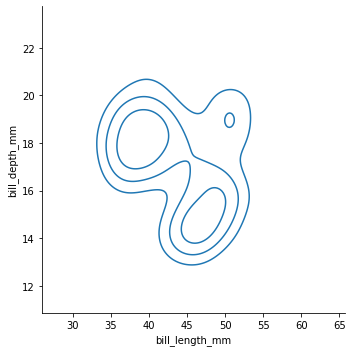

In [38]:
sns.displot(
    penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    kind="kde",
    thresh=.2,
    levels=4
)

The `levels` parameter also accepts a list of values, for more control:

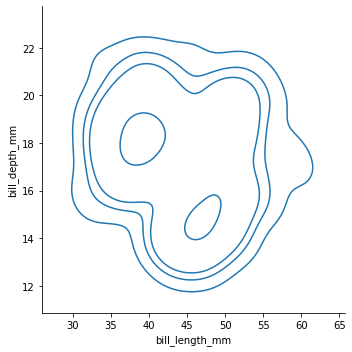

In [39]:
sns.displot(
    penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    kind="kde",
    levels=[.01, .05, .1, .8]
)

The bivariate histogram allows one or both variables to be discrete. Plotting one discrete and one continuous variable offers another way to compare conditional univariate distributions:

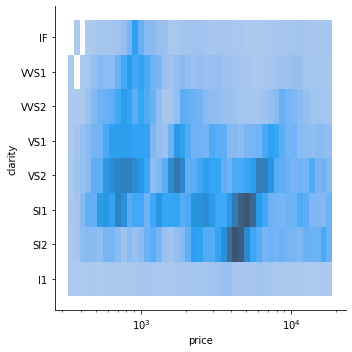

In [40]:
sns.displot(
    diamonds,
    x="price",
    y="clarity",
    log_scale=(True, False)
)

In contrast, plotting two discrete variables is an easy to way show the cross-tabulation of the observations:

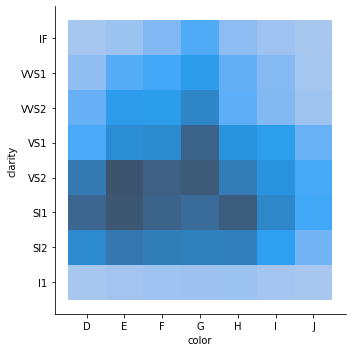

In [41]:
sns.displot(
    diamonds,
    x="color",
    y="clarity"
)

<a class="anchor" id="distribution_visualization_in_other_settings"></a>
## Distribution visualization in other settings

Several other figure-level plotting functions in seaborn make use of the [`histplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.histplot.html#seaborn.histplot "seaborn.histplot") and [`kdeplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.kdeplot.html#seaborn.kdeplot "seaborn.kdeplot") functions.

<a class="anchor" id="plotting_joint_and_marginal_distributions"></a>
### Plotting joint and marginal distributions

The first is [`jointplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.jointplot.html#seaborn.jointplot "seaborn.jointplot"), which augments a bivariate relatonal or distribution plot with the marginal distributions of the two variables. By default, [`jointplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.jointplot.html#seaborn.jointplot "seaborn.jointplot") represents the bivariate distribution using [`scatterplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.scatterplot.html#seaborn.scatterplot "seaborn.scatterplot") and the marginal distributions using [`histplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.histplot.html#seaborn.histplot "seaborn.histplot"):

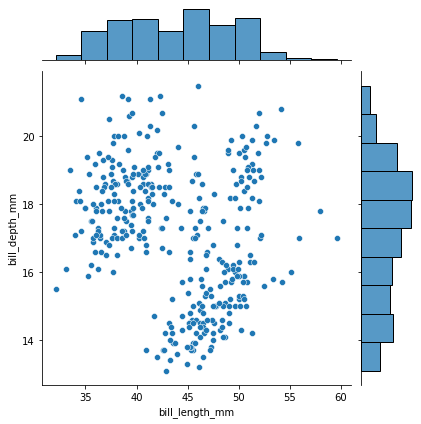

In [42]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm"
)

Similar to [`displot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.displot.html#seaborn.displot "seaborn.displot"), setting a different `kind="kde"` in [`jointplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.jointplot.html#seaborn.jointplot "seaborn.jointplot") will change both the joint and marginal plots the use [`kdeplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.kdeplot.html#seaborn.kdeplot "seaborn.kdeplot"):

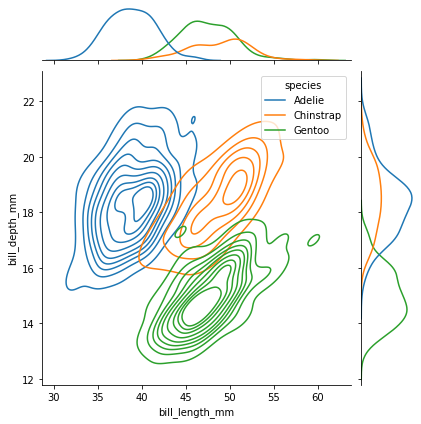

In [43]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde",
)

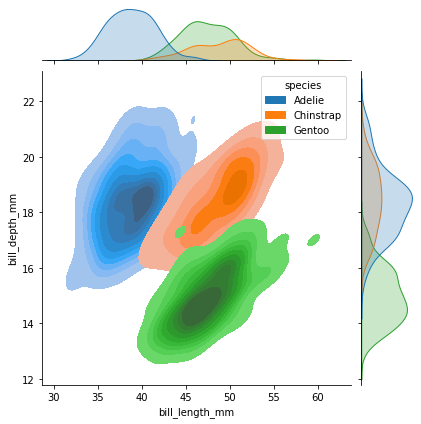

In [44]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde",
    fill=True
)

[`jointplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.jointplot.html#seaborn.jointplot "seaborn.jointplot") is a convenient interface to the [`JointGrid`](https://seaborn.pydata.org/tutorial/../generated/seaborn.JointGrid.html#seaborn.JointGrid "seaborn.JointGrid") class, which offeres more flexibility when used directly:

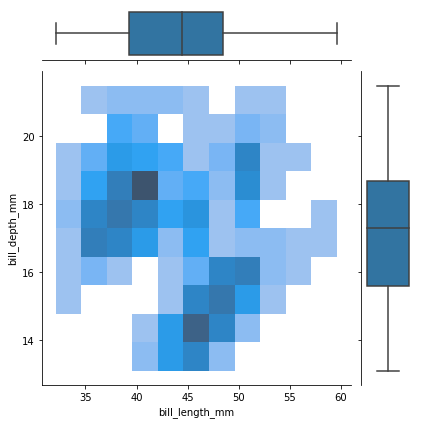

In [45]:
g = sns.JointGrid(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm"
)
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

A less-obtrusive way to show marginal distributions uses a “rug” plot, which adds a small tick on the edge of the plot to represent each individual observation. This is built into [`displot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.displot.html#seaborn.displot "seaborn.displot"):

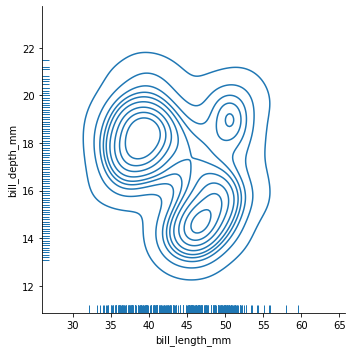

In [46]:
sns.displot(
    penguins,
    x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug=True
)

And the axes-level [`rugplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.rugplot.html#seaborn.rugplot "seaborn.rugplot") function can be used to add rugs on the side of any other kind of plot:

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

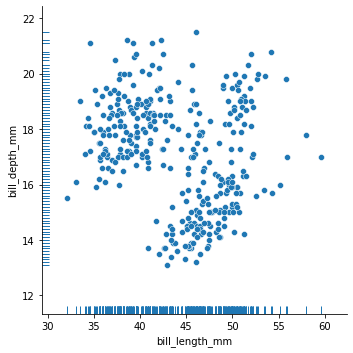

In [47]:
g = sns.relplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm"
)
sns.rugplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    ax=g.ax
)

<a class="anchor" id="plotting_many_distributions"></a>
### Plotting many distributions

The [`pairplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.pairplot.html#seaborn.pairplot "seaborn.pairplot") function offers a similar blend of joint and marginal distributions. Rather than focusing on a single relationship, however, [`pairplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.pairplot.html#seaborn.pairplot "seaborn.pairplot") uses a “small-multiple” approach to visualize the univariate distribution of all variables in a dataset along with all of their pairwise relationships:

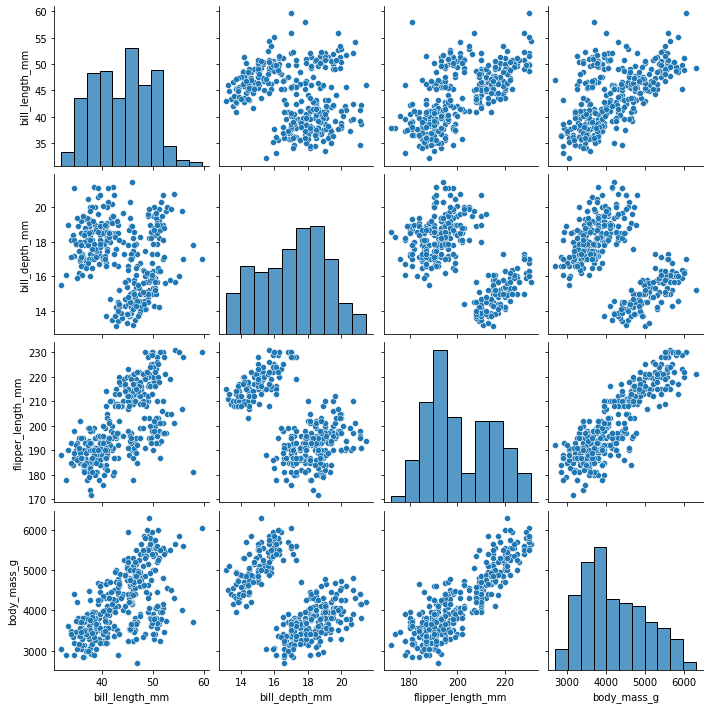

In [48]:
sns.pairplot(penguins)

As with [`jointplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.jointplot.html#seaborn.jointplot "seaborn.jointplot")/[`JointGrid`](https://seaborn.pydata.org/tutorial/../generated/seaborn.JointGrid.html#seaborn.JointGrid "seaborn.JointGrid"), using the underlying [`PairGrid`](https://seaborn.pydata.org/tutorial/../generated/seaborn.PairGrid.html#seaborn.PairGrid "seaborn.PairGrid") directly will afford more flexibility with only a bit more typing:

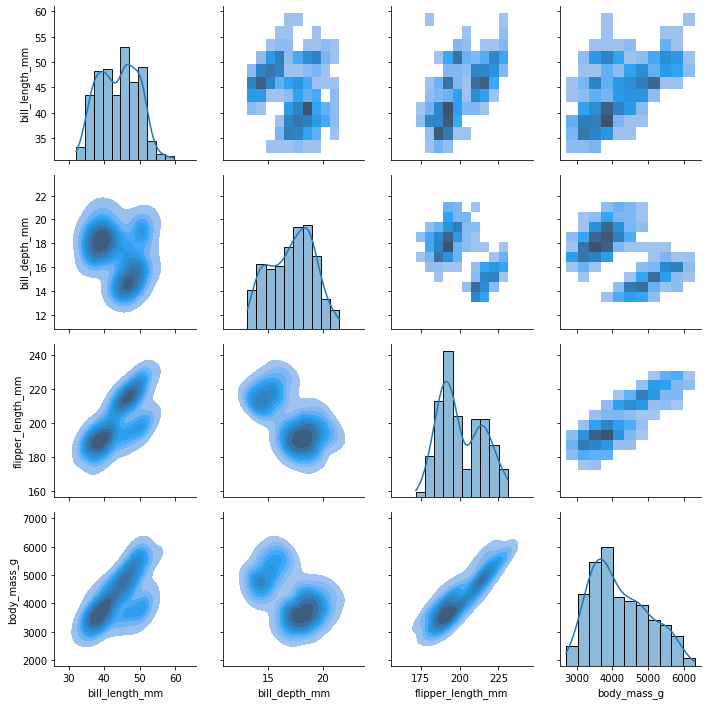

In [49]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)